In [43]:
# import libraries for data processing
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('IMDB-Dataset.csv')

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [41]:
pip install scikit-learn xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 764.3 kB/s eta 0:02:43
   ---------------------------------------- 0.8/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 1.0/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 1.0/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 1.3/124.9 MB 919.8 kB/s eta 0:02:15
    --------------------------------------- 1.8/124.9 MB 1.3 MB/s eta 0:01:37
    ---------------------------

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
print(df.shape)

(50000, 2)


In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
duplicates = df.duplicated()
duplicates

Handling Missing values

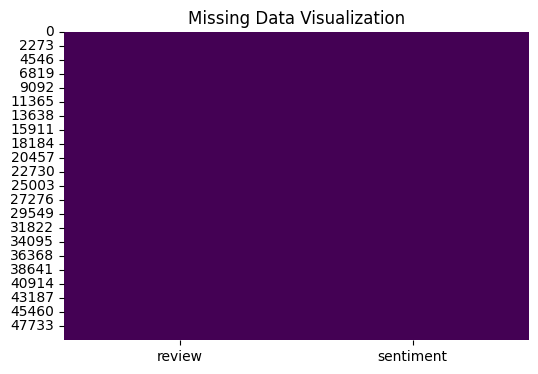

Missing Data Counts:
 review       0
sentiment    0
dtype: int64


In [7]:
missing_data = df.isnull().sum()
# Visualize missing data
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Visualization')
plt.show()

# Print missing data counts
print("Missing Data Counts:\n", missing_data)

In [8]:
# Identify duplicate data
duplicate_rows = df[df.duplicated()]

# Display duplicate rows if they exist
if not duplicate_rows.empty:
    print("\nDuplicated Rows:")
    print(duplicate_rows)
else:
    print("\nNo duplicated rows found.")

# Print the count of duplicate rows
print(f"\nNumber of Duplicated Rows: {len(duplicate_rows)}")


Duplicated Rows:
                                                  review sentiment
3537   Quite what the producers of this appalling ada...  negative
3769   My favourite police series of all time turns t...  positive
4391   Beautiful film, pure Cassavetes style. Gena Ro...  positive
6352   If you liked the Grinch movie... go watch that...  negative
6479   I want very much to believe that the above quo...  negative
...                                                  ...       ...
49912  This is an incredible piece of drama and power...  positive
49950  This was a very brief episode that appeared in...  negative
49984  Hello it is I Derrick Cannon and I welcome you...  negative
49986  This movie is a disgrace to the Major League F...  negative
49991  Les Visiteurs, the first movie about the medie...  negative

[418 rows x 2 columns]

Number of Duplicated Rows: 418


In [10]:
# Remove duplicate rows
df = df.drop_duplicates()

Here we will perform data cleaning through steps such as: removing HTML tags, removing punctuation, removing numbers, removing icons, etc.

In [15]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup


stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dphng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dphng\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
!pip install contractions


In [14]:
import contractions

In [19]:
# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data


def preprocess_text(text):
    wl = WordNetLemmatizer()

    # Removing HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Expanding contractions (e.g., "don't" to "do not")
    text = expand_contractions(text)

    # Removing emojis using regex (corrected ranges)
    emoji_clean = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE
    )
    text = emoji_clean.sub(r'', text)

    # Add a space after a full stop if missing
    text = re.sub(r'\.(?=\S)', '. ', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation and make text lowercase
    text = "".join([word.lower()
                   for word in text if word not in string.punctuation])

    # Lemmatize words, remove stopwords, and keep only alphabetic characters
    text = " ".join([wl.lemmatize(word) for word in text.split()
                    if word not in stop and word.isalpha()])

    return text


# Applying the preprocess_text function to a dataframe column
df['review'] = df['review'].apply(preprocess_text)

C:\Users\dphng\AppData\Local\Temp\ipykernel_23760\3508540574.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [31]:
x_data = df['review']

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
# Use CountVectorizer to create the vocabulary
vectorizer = CountVectorizer()
vectorizer.fit(x_data)

# The vocabulary size
vocab_size = len(vectorizer.vocabulary_)

print(f"Kích thước bộ từ điển sau bước tiền xử lý: {vocab_size}")

Kích thước bộ từ điển sau bước tiền xử lý: 143142


Data analysis

In [21]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [24]:
freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])


In [25]:
data = [freq_pos, freq_neg]
labels = ['positive', 'negative']

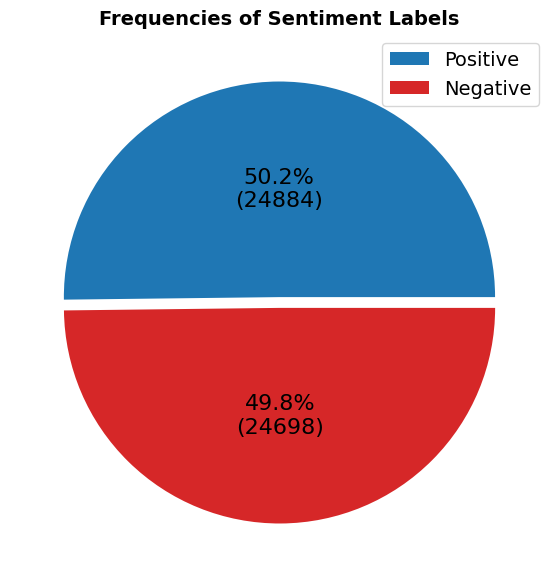

In [28]:
# Create pie chart
fig, ax = plt.subplots(figsize=[11, 7])
plt.pie(
    x=data,
    autopct=lambda pct: func(pct, data),
    explode=[0.025]*2,  # Adding a small "explode" effect
    pctdistance=0.5,  # Distance of the percentage labels from the center
    colors=[sns.color_palette()[0], 'tab:red'],  # Corrected color definition
    textprops={'fontsize': 16}  # Text properties
)
# Add title to the pie chart
plt.title('Frequencies of Sentiment Labels', fontsize=14, fontweight='bold')

# Define the labels for the pie chart
labels = ['Positive', 'Negative']

# Add legend to the chart
plt.legend(labels, loc="best", prop={'size': 14})

# Save the pie chart as a PNG file
plt.savefig("PieChart.png")

# Show the pie chart
plt.show()

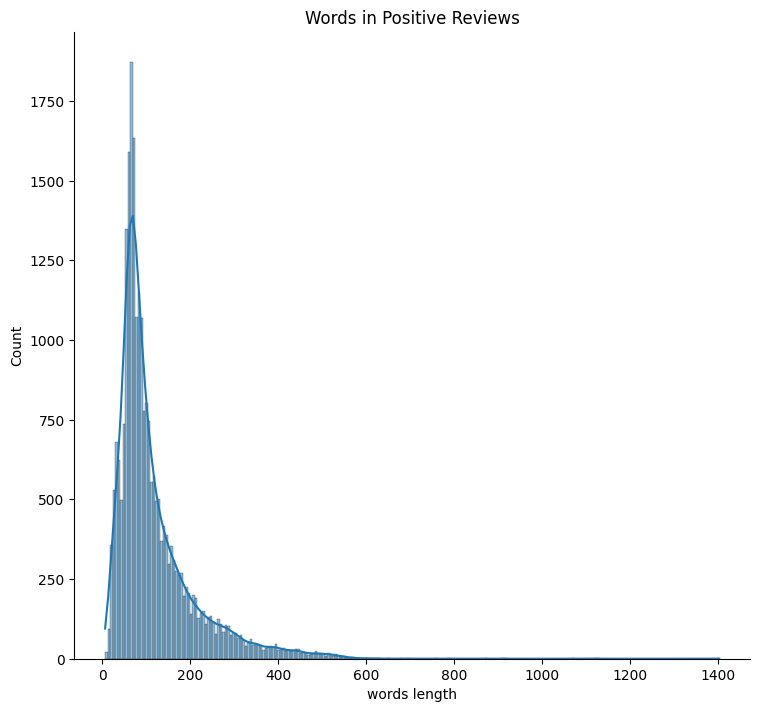

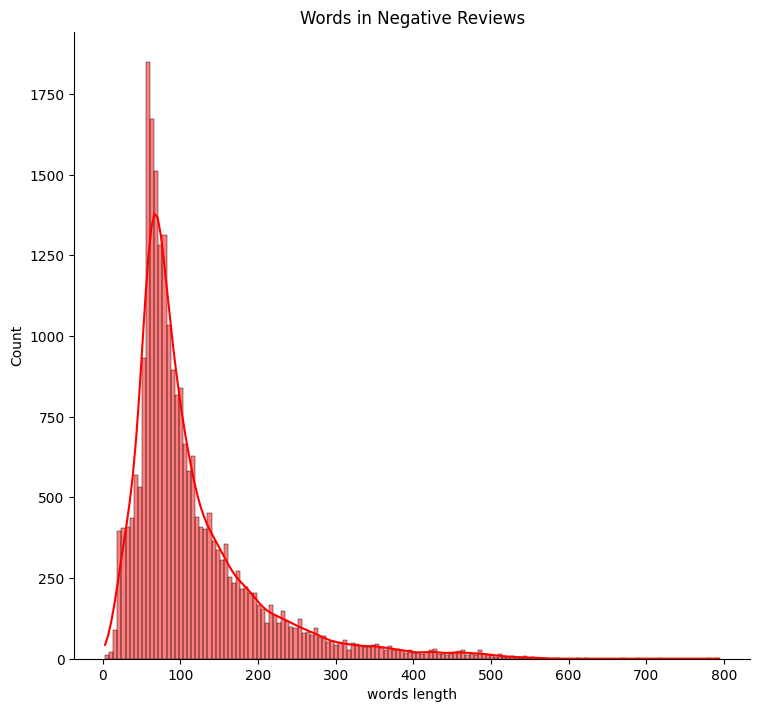

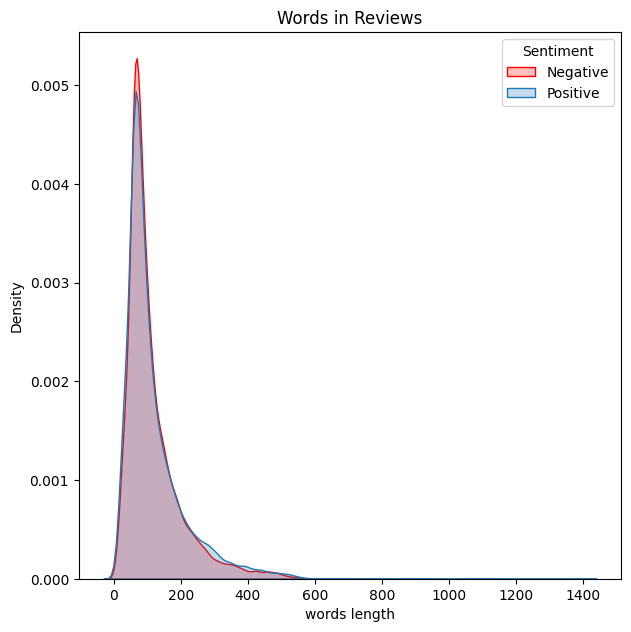

In [29]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

# Plot for positive sentiment reviews
hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False
).set(title='Words in Positive Reviews')

# Show the plot
plt.show()

# Plot for negative sentiment reviews
hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length", hue="sentiment", kde=True, height=7, aspect=1.1, legend=False, palette=['red']
).set(title='Words in Negative Reviews')

# Show the plot
plt.show()

# KDE plot for words in reviews with sentiment comparison
plt.figure(figsize=(7, 7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True, palette=[sns.color_palette()[0], 'red']
).set(title='Words in Reviews')

# Add legend with sentiment labels
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])

# Show the plot
plt.show()

Split train and test

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer .fit (x_train , y_train )

TfidfVectorizer(max_features=10000)

In [34]:
x_train_encoded = tfidf_vectorizer . transform (x_train )
x_test_encoded = tfidf_vectorizer . transform (x_test )

In [37]:
dt_classifier = DecisionTreeClassifier(
    criterion= 'entropy',
    random_state= 42
)
dt_classifier.fit(x_train_encoded, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.7118080064535646

In [38]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8397


In [44]:
# Initialize the models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store the accuracy results
model_accuracies = {}

# Training and evaluating each model
for name, model in models.items():
    # Fit the model on the training data
    model.fit(x_train_encoded, y_train)

    # Make predictions on the test data
    y_pred = model.predict(x_test_encoded)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

    # Print the model performance
    print(f"\n{name} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Print out a summary of accuracies for all models
print("\nSummary of Model Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")


Decision Tree Model:
Accuracy: 0.7115
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4939
           1       0.71      0.71      0.71      4978

    accuracy                           0.71      9917
   macro avg       0.71      0.71      0.71      9917
weighted avg       0.71      0.71      0.71      9917


Random Forest Model:
Accuracy: 0.8397
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4939
           1       0.84      0.84      0.84      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



c:\Users\dphng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Model:
Accuracy: 0.7922
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      4939
           1       0.77      0.83      0.80      4978

    accuracy                           0.79      9917
   macro avg       0.79      0.79      0.79      9917
weighted avg       0.79      0.79      0.79      9917


Gradient Boosting Model:
Accuracy: 0.7973
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.78      4939
           1       0.77      0.86      0.81      4978

    accuracy                           0.80      9917
   macro avg       0.80      0.80      0.80      9917
weighted avg       0.80      0.80      0.80      9917



c:\Users\dphng\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:46:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model:
Accuracy: 0.8478
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4939
           1       0.83      0.87      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917


Summary of Model Accuracies:
Decision Tree: 0.7115
Random Forest: 0.8397
AdaBoost: 0.7922
Gradient Boosting: 0.7973
XGBoost: 0.8478
